In [16]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import math

### Following
- https://realpython.com/python-keras-text-classification/

In [17]:
df = pd.read_csv('posts_all_filtered.csv', header=None)
df.columns = ['category','content']
print(len(df.index))

511


In [18]:
df.head(2)

,category,content
0,relationships,previous post link tl dr pretty sure got direc...
1,relationships,situation worked hard rise humble beginning ge...


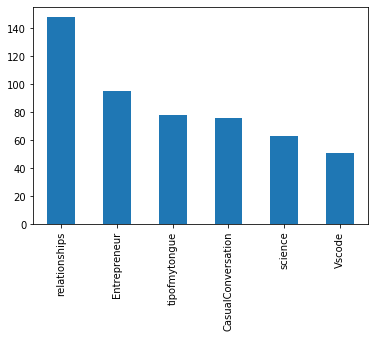

In [19]:
#balance classes
df.category.value_counts().plot(kind='bar')

In [28]:
min_category = False
categories = df.category.unique()
for category in categories:
    curr_category = len(df[df.category == category].index)
    if min_category:
        min_category = min(min_category, curr_category)
    else:
        min_category = curr_category
print(min_category)
res = []
for category in categories:
    res.append(df[df.category == category].sample(min_category))
df = pd.concat(res)
print(len(df.index))

51
306


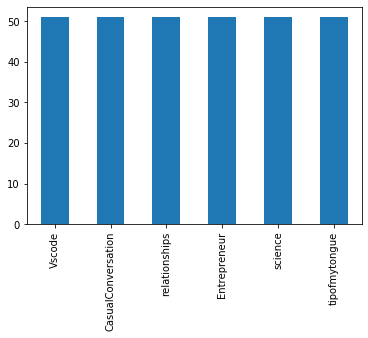

In [29]:
df.category.value_counts().plot(kind='bar')

In [39]:
train_x, valid_x, train_y, valid_y = train_test_split(df['content'], df['category'])
vectorizer = CountVectorizer()
vectorizer.fit(train_x)
train_X = vectorizer.transform(train_x)
valid_X  = vectorizer.transform(valid_x)

In [40]:
classifier = LogisticRegression()
classifier.fit(train_X, train_y)

/Users/juan/Documents/manu/dev/reddit-ml/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/juan/Documents/manu/dev/reddit-ml/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
score = classifier.score(valid_X, valid_y)
print("Accuracy:", score)

Accuracy: 0.8441558441558441


In [16]:
valid_x.head(12).reset_index()

,index,content
0,78,To protect the names and identities of everyon...
1,455,My girlfriend (20F) and I (26M) broke up after...
2,215,This series was posted around either 2006-2007...
3,461,My fiancée and I have known each other since h...
4,108,I burnout and lose motivation every now and then.
5,60,I've been in a serious relationship for over 2...
6,374,"So, my ex and I dated for 4 years. We planned ..."
7,286,"Study uses fake financial firms, swaps headsho..."
8,226,This came up in another thread and was suggest...
9,429,"After over 18 years of regular churchgoing, I ..."


In [17]:
valid_y.head(12).reset_index()

,index,category
0,78,relationships
1,455,relationships
2,215,tipofmytongue
3,461,relationships
4,108,Entrepreneur
5,60,relationships
6,374,CasualConversation
7,286,science
8,226,tipofmytongue
9,429,CasualConversation


In [18]:
classifier.predict(valid_X[5])

array(['relationships'], dtype=object)